Dzar Bela Hanifa
<br>
13515007
<br>
Laporan TBD Tugas 1 - num_friends, daily_minutes
<br>
Bahasa : Python 2.7

In [22]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


data = open("dataSourceStatistic.txt", "r")
numbers = "0123456789."
num_friends = []
daily_minutes = []
count_line = 0
for line in data:
    if count_line == 0:
        num_friends = line
    elif count_line == 2:
        daily_minutes = line
    count_line += 1
    


Pertama-tama, data yang diperoleh akan dibersihkan terlebih dahulu dari karakter-karakter lain yang bukan merupakan angka

In [23]:
num_friends = num_friends.split(",")
clean_num_friends = []
unique_clean_num_friends = []

for elements in num_friends :
    current_elements = ""
    for char in elements:
        if char in numbers:
            current_elements += char
    clean_num_friends.append(int(current_elements))
    
num_friends = clean_num_friends

daily_minutes = daily_minutes.split(",")
clean_daily_minutes = []
unique_clean_daily_minutes = []

for elements in daily_minutes :
    current_elements = ""
    for char in elements:
        if char in numbers:
            current_elements += char
    clean_daily_minutes.append(float(current_elements))
    
daily_minutes = clean_daily_minutes

Setelah itu, akan dibuat dataframe menggunakan bantuan library pandas

In [24]:
#Create dataframe based on daily_minutes and num_friends

df = pd.DataFrame()
df['daily_minutes'] = clean_daily_minutes
df['num_friends'] = clean_num_friends

In [25]:
#Largest and smallest value in num_friends

print "largest value in num_friends:", max(df['num_friends'])
print "smallest value in num_friends:", min(df['num_friends'])

largest value in num_friends: 100
smallest value in num_friends: 1


In [26]:
#Second Largest and Second Smallest value in num_friends

print "second largest value in num_friends", sorted(list(set(df['num_friends'])), reverse=True)[1]
print "second smallest value in num_friends", sorted(list(set(df['num_friends']))) [1]

second largest value in num_friends 49
second smallest value in num_friends 2


In [27]:
#Mean of num_friends

print df['num_friends'].mean()

7.333333333333333


In [28]:
#Median of num_friends

print df['num_friends'].median()

6.0


In [29]:
#Quantile of num_friends

print "0.1 Quantile : ", df['num_friends'].quantile(q=0.1)
print "0.25 Quantilea : ", df['num_friends'].quantile(q=0.25)
print "0.75 Quantile : ", df['num_friends'].quantile(q=0.75)
print "0.90 Quantile : ", df['num_friends'].quantile(q=0.90)

0.1 Quantile :  1.0
0.25 Quantile :  3.0
0.75 Quantile :  9.0
0.90 Quantile :  13.0


In [30]:
#Mode of num_friends

for elements in df['num_friends'].mode():
    print elements

1
6


In [31]:
#Data range of num_friends

max(df['num_friends']) - min(df['num_friends'])

99

In [32]:
#Variance of num_friends

df['num_friends'].var()

81.54351395730707

In [33]:
#Standar deviation of num_friends

df['num_friends'].std()

9.030144736232474

In [34]:
#Interquartile range of num_friends

df['num_friends'].quantile(q=0.75) - df['num_friends'].quantile(q=0.25)

6.0

In [35]:
#Covariance between num_friends and daily_minutes

df['num_friends'].cov(df["daily_minutes"])

22.425435139573054

In [42]:
#Correlation between num_friends and daily_minutes

print df['num_friends'].corr(df["daily_minutes"])

0.5736792115665574


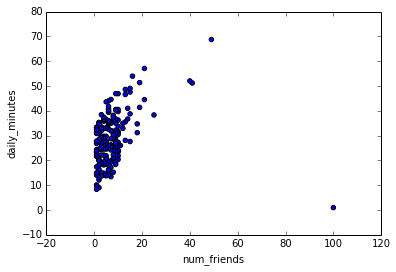

In [37]:
df.plot.scatter(x='num_friends', y='daily_minutes');
plt.show()

Dapat dilihat dari plot di atas terdapat sebuah data yang nilai num_friendsnya merupakan pencilan. Data tersebut adalah data dengan num_friends bernilai 100. Mari kita periksa distribusi num_friends menggunakan boxplot diagram.

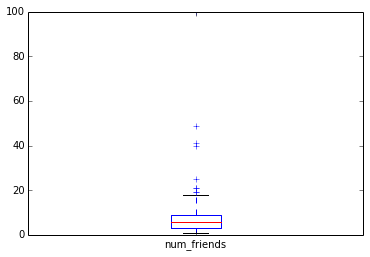

In [38]:
df['num_friends'].plot(kind='box')

Dapat kita lihat dari distribusi data tersebut terdapat beberapa data yang merupakan pencilan (di luar fence dari boxplot). Akan tetapi ada satu data yang merupakan pencilan ekstrem yaitu data dengan nilai num_friends 100. Oleh karena itu, data tersebut akan dihapus agar distribusi menggunakan scatter plot lebih terlihat

In [39]:
df = df[df.num_friends != 100]

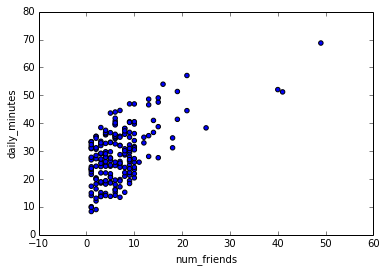

In [40]:
df.plot.scatter(x='num_friends', y='daily_minutes');

Setelah data dengan num_friends bernilai 100 dibuang, distribusi data terlihat dengan lebih jelas. Insight yang dapat kita peroleh dari plot ini adalah terdapat suatu relasi antara num_friends dengan daily_minutes. Relasi tersebut berbentuk hubungan logaritmik.